# Plot a case

Here we pick out a case and look in detail at the results

In [2]:
import os
import pickle
import numpy as np
import scipy.interpolate as spi
import matplotlib.pyplot as plt
%matplotlib inline

import flayer
import particle_evolution
import feo_thermodynamics as feot
import multiprocessing
import bulk_case_runner
import earth_model
import layer_setup

# Light blue square

In [5]:
data = bulk_case_runner.load_case_data('/Users/andreww/Code/slurry_cases/light_blue_hetro_i0_test/case_details/case_40.0_0.01_1E-6.pkl')

# Some data missing from files
analysis_radii = np.linspace(data["r_icb"], data["r_icb"] + data["f_layer_thickness"],
                                     data["number_of_analysis_points"])

data["analysis_radii"] = analysis_radii  

In [13]:
np.nanmax(data["nucleation_rates"])

6.10006695195493e-07

In [17]:
data["solid_vf"]*100

array([0.00000000e+000, 1.05038604e-004, 9.22366307e-005, 8.07240976e-005,
       7.04060386e-005, 6.11820924e-005, 5.29494209e-005, 4.55987473e-005,
       3.90897840e-005, 3.33755559e-005, 2.83468888e-005, 2.39451488e-005,
       2.01046609e-005, 1.67649600e-005, 1.38760552e-005, 1.14025989e-005,
       9.29242682e-006, 7.51041527e-006, 6.01506093e-006, 4.77082197e-006,
       3.74186410e-006, 2.89832762e-006, 2.21921150e-006, 1.67709310e-006,
       1.25263202e-006, 9.26644252e-007, 6.74537223e-007, 4.83216126e-007,
       3.39798840e-007, 2.33820803e-007, 1.57224114e-007, 1.03138438e-007,
       6.57646079e-008, 4.06567151e-008, 2.41293951e-008, 1.38001512e-008,
       7.54485010e-009, 3.93509233e-009, 1.93580218e-009, 8.90934015e-010,
       3.77548398e-010, 1.48946625e-010, 5.23154617e-011, 1.67338235e-011,
       4.68474303e-012, 1.11284097e-012, 2.13670155e-013, 3.22193757e-014,
       2.53571284e-015, 3.57634844e-016, 2.37965752e-017, 9.07271596e-019,
       2.20124305e-020, 2

Particle radii between 0.0162 and 1.22e-05 m


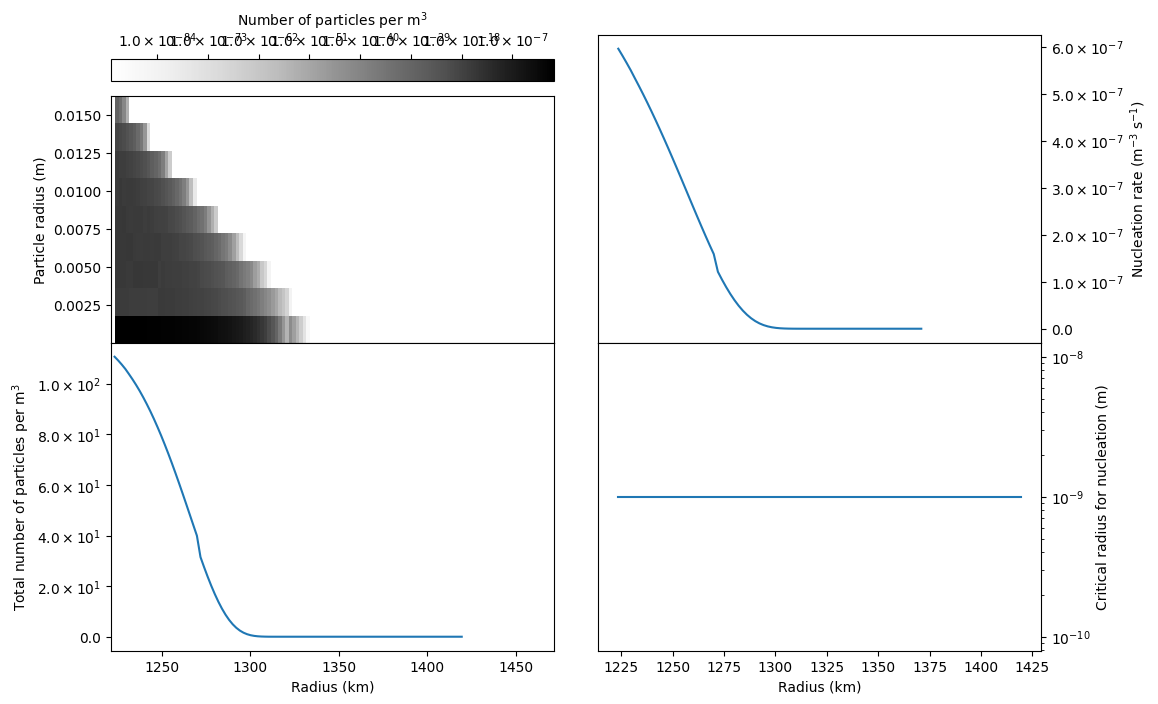

In [16]:
bulk_case_runner.plot_case_csd_nuc(logscale=True, nonuc=False, **data)


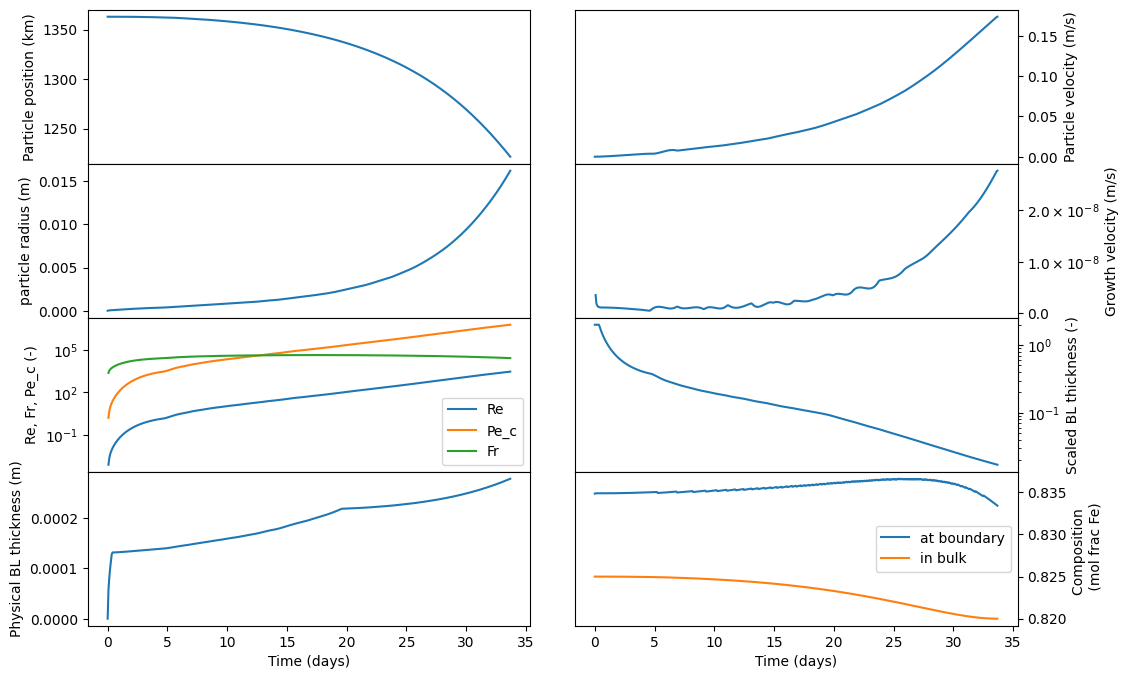

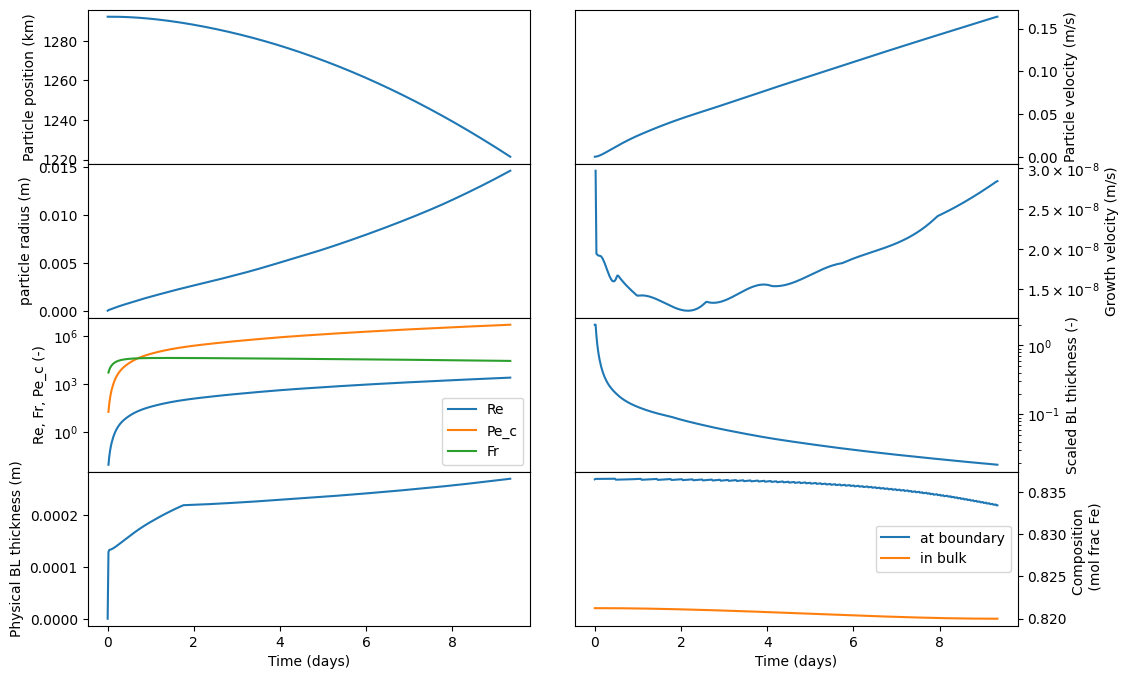

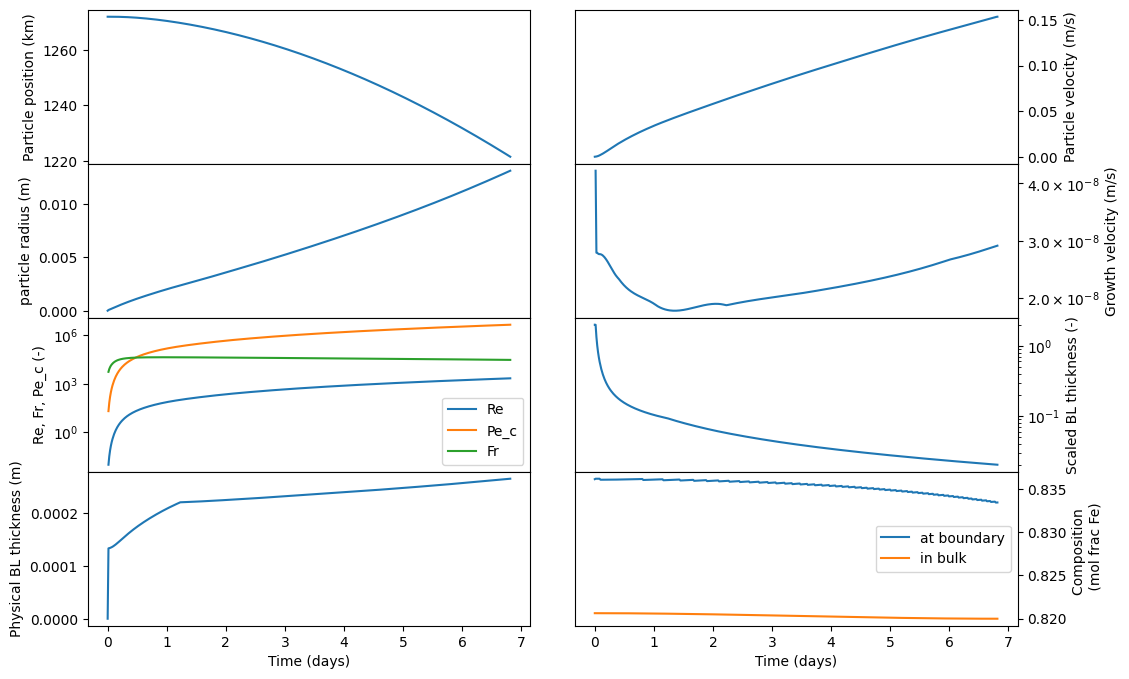

In [4]:
# Reuse general layer setup code, but we don't need many of the functions
# so we never need to rerun this (fairly expensive) function

r_icb = data["r_icb"]
r_flayer_top = data["r_icb"] + data["f_layer_thickness"]
_, adiabatic_temperature_function, _, _, _, pressure_function, gravity_function, _ \
            = layer_setup.setup_flayer_functions(data["r_icb"], data["r_cmb"],
                                                 data["f_layer_thickness"], 
                                                 data["gruneisen_parameter"], 10, 
                                                 data["xfe_outer_core"],
                                                 data["xfe_outer_core"], data["analysis_radii"])


temperature_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, adiabatic_temperature_function(r_icb)+40.0, 
            adiabatic_temperature_function(r_flayer_top))
composition_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, data["xfe_outer_core"]-0.01, data["xfe_outer_core"])


particle_evolution.plot_particle_evolution_time(data["solutions"][70], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

particle_evolution.plot_particle_evolution_time(data["solutions"][35], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

particle_evolution.plot_particle_evolution_time(data["solutions"][25], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

# Light blue diamond

Particle radii between 0.0234 and 9.49e-06 m


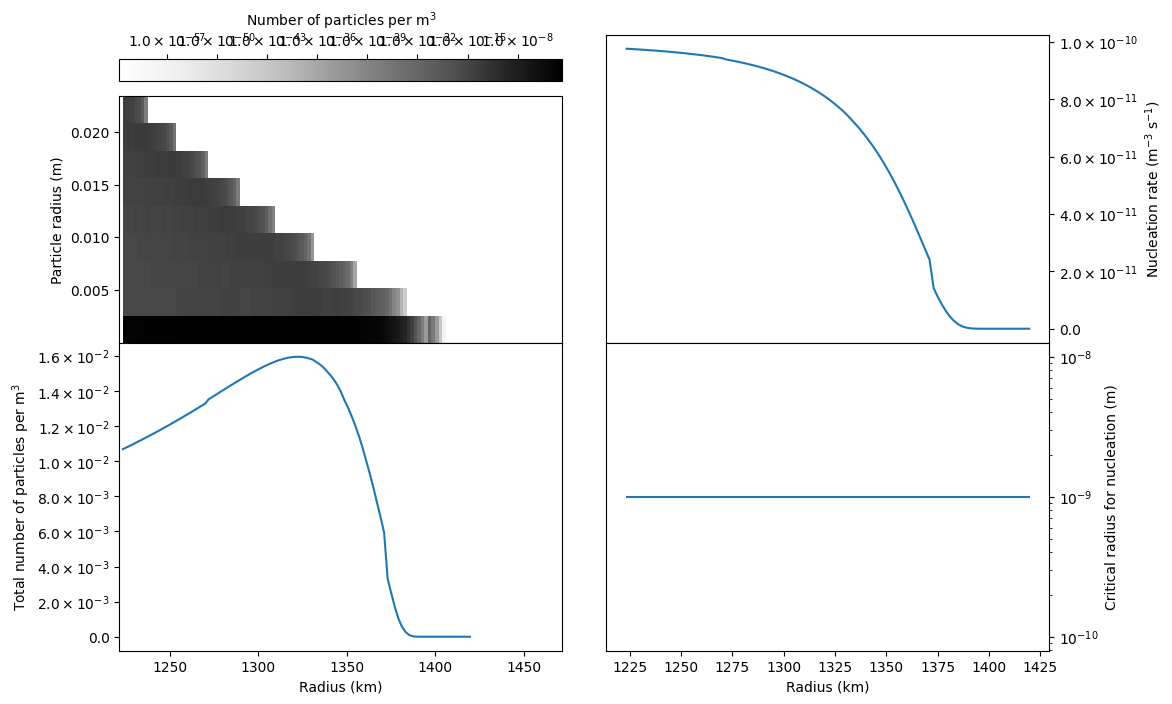

In [5]:
data = bulk_case_runner.load_case_data('/Users/andreww/Code/slurry_cases/light_blue/cases_details/case_-25.0_0.000625.pkl')

# Some data missing from files
analysis_radii = np.linspace(data["r_icb"], data["r_icb"] + data["f_layer_thickness"],
                                     data["number_of_analysis_points"])

data["analysis_radii"] = analysis_radii  

bulk_case_runner.plot_case_csd_nuc(logscale=True, nonuc=False, **data)


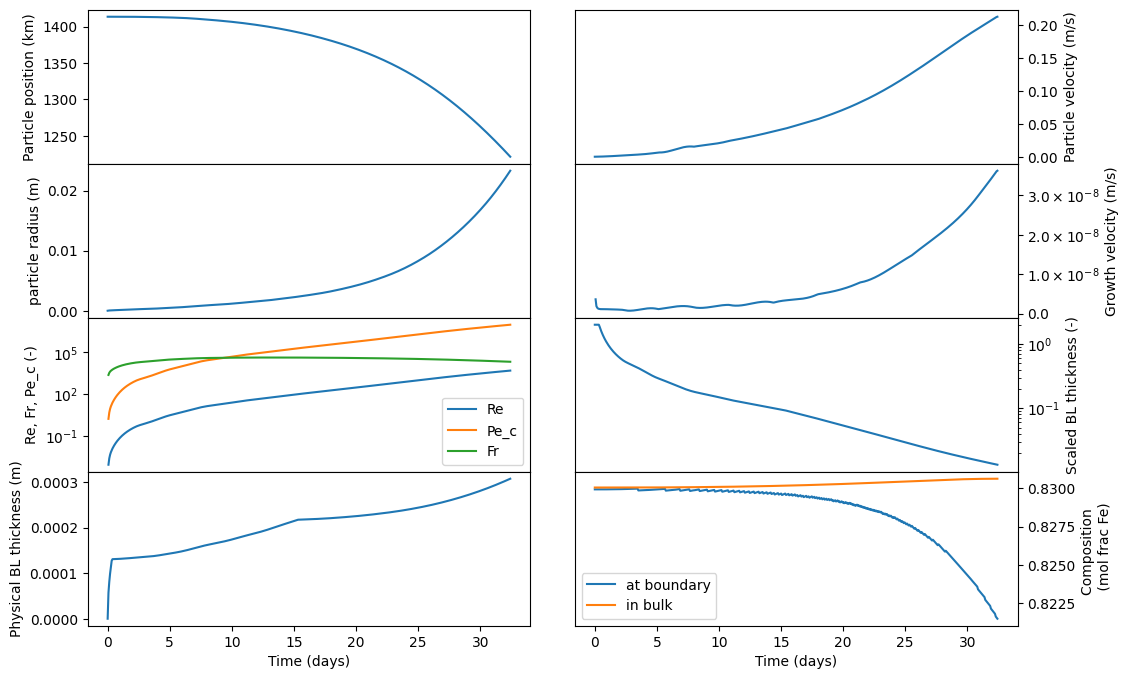

In [6]:
# Reuse general layer setup code, but we don't need many of the functions
# so we never need to rerun this (fairly expensive) function

r_icb = data["r_icb"]
r_flayer_top = data["r_icb"] + data["f_layer_thickness"]
_, adiabatic_temperature_function, _, _, _, pressure_function, gravity_function, _ \
            = layer_setup.setup_flayer_functions(data["r_icb"], data["r_cmb"],
                                                 data["f_layer_thickness"], 
                                                 data["gruneisen_parameter"], 10, 
                                                 data["xfe_outer_core"],
                                                 data["xfe_outer_core"], data["analysis_radii"])


temperature_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, adiabatic_temperature_function(r_icb)-25.0, 
            adiabatic_temperature_function(r_flayer_top))
composition_function = layer_setup.fit_quad_func_boundaries(
            r_icb, r_flayer_top, data["xfe_outer_core"]+0.000625, data["xfe_outer_core"])


particle_evolution.plot_particle_evolution_time(data["solutions"][95], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

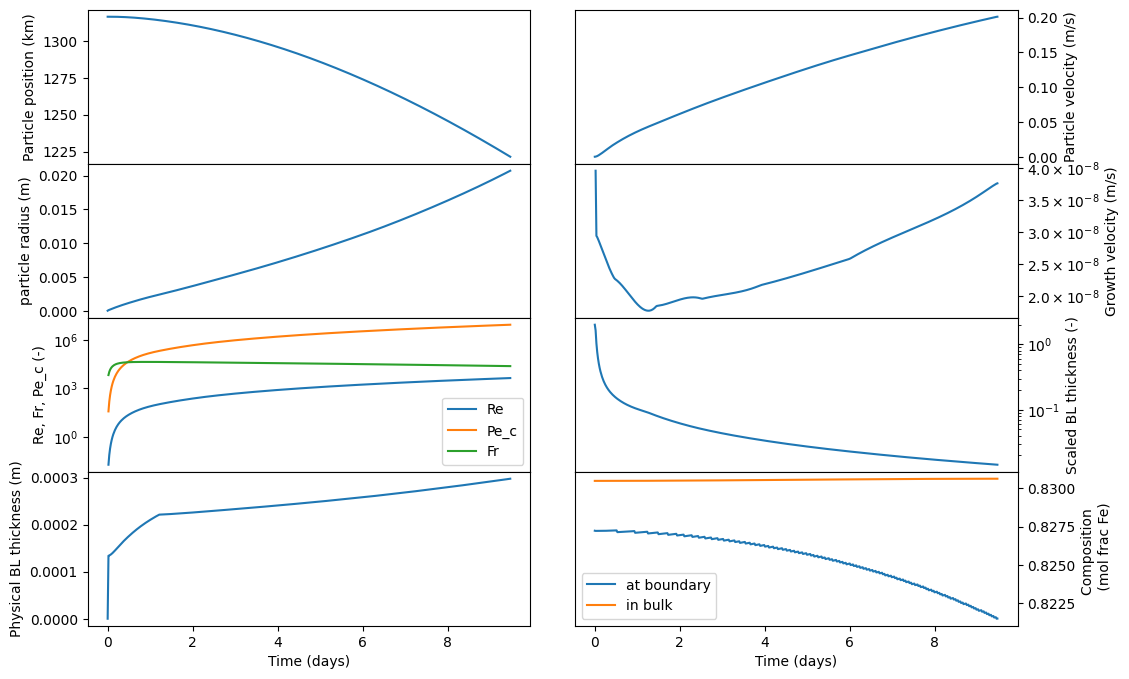

In [7]:
particle_evolution.plot_particle_evolution_time(data["solutions"][47], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])

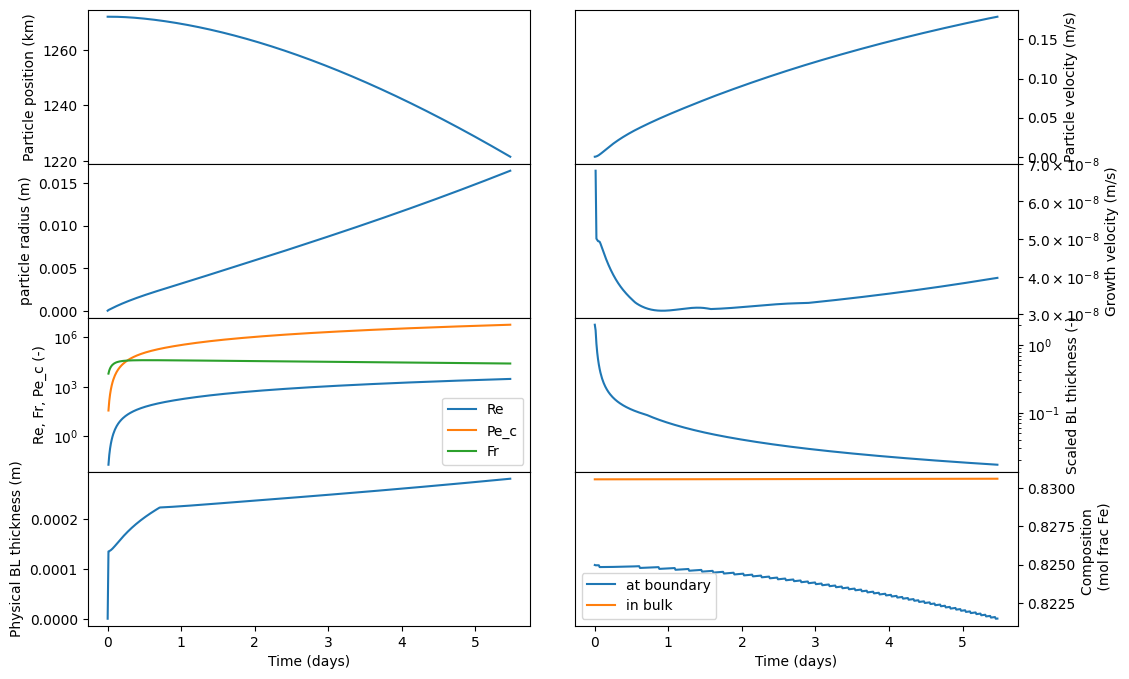

In [8]:
particle_evolution.plot_particle_evolution_time(data["solutions"][25], composition_function, temperature_function,
                                                pressure_function, data["chemical_diffusivity"], data["growth_prefactor"],
                                                gravity_function, data["kinematic_viscosity"])